Pytorch는 주요 모델에 대해 사전학습된 모델을 제공합니다.

https://pytorch.org/vision/0.17/models.html#general-information-on-pre-trained-weights

이를 활용하는 법을 알아봅시다


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets
import torchvision.transforms as transforms
import torchvision.models as models

path = '/content/drive/MyDrive/Teaching/PD 2401/wildcats'

train_data = datasets.ImageFolder(path + '/train', transform = transforms.ToTensor())
valid_data = datasets.ImageFolder(path + '/valid', transform = transforms.ToTensor())
test_data = datasets.ImageFolder(path + '/test', transform = transforms.ToTensor())

batch_size = 32
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, shuffle =True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)

https://pytorch.org/vision/main/models/generated/torchvision.models.mobilenet_v3_small.html#torchvision.models.MobileNet_V3_Small_Weights

모바일넷을 불러와보겠습니다. Imagenet 데이터에  학습된 weight을 가져오겠습니다 .



In [2]:
model = models.mobilenet_v3_small(weights='IMAGENET1K_V1')
#model = models.mobilenet_v3_small(weights='DEFAULT')   # 이렇게 적어도 동일합니다.

Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth
100%|██████████| 9.83M/9.83M [00:00<00:00, 35.8MB/s]


모델은 최종적으로 1000개를 분류할 수 있습니다.

https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

사전학습에 사용된 데이터셋은 imagenet으로 100만장 이상의 학습데이터가 있습니다

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

출력된 모델을 보면 가장 마지막 클래스에 분류가 1000개로 되었다는 것을 확인할 수 있습니다.

In [6]:
from torchsummary import summary
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 112, 112]             432
       BatchNorm2d-2         [-1, 16, 112, 112]              32
         Hardswish-3         [-1, 16, 112, 112]               0
            Conv2d-4           [-1, 16, 56, 56]             144
       BatchNorm2d-5           [-1, 16, 56, 56]              32
              ReLU-6           [-1, 16, 56, 56]               0
 AdaptiveAvgPool2d-7             [-1, 16, 1, 1]               0
            Conv2d-8              [-1, 8, 1, 1]             136
              ReLU-9              [-1, 8, 1, 1]               0
           Conv2d-10             [-1, 16, 1, 1]             144
      Hardsigmoid-11             [-1, 16, 1, 1]               0
SqueezeExcitation-12           [-1, 16, 56, 56]               0
           Conv2d-13           [-1, 16, 56, 56]             256
      BatchNorm2d-14           [-1, 16,

사전학습된 weight를 불렀으므로 모델은 1000개의 대상을 분류할 수 있습니다.
또한 모든 weight가 Trainable 이므로 추가 데이터 학습도 가능합니다



In [7]:
model.eval()
with torch.no_grad():
  for x,y in test_loader:
    x = x.to(device)
    y = y.to(device)
    pred = model(x)
    break

In [8]:
pred.shape

torch.Size([32, 1000])

In [9]:
pred_y = pred.argmax(1)

In [10]:
pred_y

tensor([293, 285, 292, 293, 288, 288, 281, 287, 287, 289, 290, 290, 282, 288,
        293, 290, 286, 294, 292, 289, 290, 290, 288, 288, 292, 293, 287, 291,
        286, 286, 292, 291], device='cuda:0')

라벨을 불러서 확인해봅시다

https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

In [11]:
import pandas as pd

url = 'https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt'
classes = pd.read_csv(url, header = None)

In [12]:
classes

,0
0,tench
1,goldfish
2,great white shark
3,tiger shark
4,hammerhead
...,...
995,earthstar
996,hen-of-the-woods
997,bolete
998,ear


In [13]:
labels = classes[0].values

In [14]:
labels

array(['tench', 'goldfish', 'great white shark', 'tiger shark',
       'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich',
       'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting',
       'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel',
       'kite', 'bald eagle', 'vulture', 'great grey owl',
       'European fire salamander', 'common newt', 'eft',
       'spotted salamander', 'axolotl', 'bullfrog', 'tree frog',
       'tailed frog', 'loggerhead', 'leatherback turtle', 'mud turtle',
       'terrapin', 'box turtle', 'banded gecko', 'common iguana',
       'American chameleon', 'whiptail', 'agama', 'frilled lizard',
       'alligator lizard', 'Gila monster', 'green lizard',
       'African chameleon', 'Komodo dragon', 'African crocodile',
       'American alligator', 'triceratops', 'thunder snake',
       'ringneck snake', 'hognose snake', 'green snake', 'king snake',
       'garter snake', 'water snake', 'vine snake', 'night snake',
     

In [15]:
import matplotlib.pyplot as plt

for i in range(10):

  plt.imshow(x[i].to('cpu').numpy().transpose(1,2,0))
  plt.title(labels[pred_y[i].item()])
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

이미지가 어떤식으로 변하는지 살펴봅시다

In [16]:
# 각 레이어의 출력을 저장할 딕셔너리 생성
outputs = {}

# 모델의 각 레이어를 순회하면서 출력값 저장
def hook(module, input, output):
    outputs[module] = output

for module in model.modules():
    module.register_forward_hook(hook)

In [17]:
# 데이터셋의 이미지 구조를 확인

test_data[0][0].shape

torch.Size([3, 224, 224])

In [18]:
# 모델에 이미지 전달하여 출력값 계산
output = model(test_data[0][0].unsqueeze(0).to(device))

In [19]:
output

tensor([[-1.0366e+01, -8.2410e+00, -1.0681e+01, -8.6825e+00, -1.1202e+01,
         -2.3982e+00, -3.7196e+00, -1.5326e-02, -2.4308e-01,  4.5689e+00,
         -6.1719e+00, -9.1782e+00, -6.5680e+00, -8.4910e+00, -6.7058e+00,
         -5.6582e+00, -7.1687e+00, -6.8316e+00, -3.0986e+00, -7.8601e+00,
         -6.5995e+00,  5.5815e-01, -3.2926e+00,  2.5396e+00,  2.1577e+00,
         -4.9636e+00, -2.3184e+00, -3.1624e+00, -5.6701e+00, -4.9372e+00,
         -3.7189e+00, -4.1533e+00, -6.0301e-01, -2.5864e+00, -8.5543e-01,
         -3.6819e+00, -2.6644e+00, -4.9440e+00,  2.5820e+00, -3.9444e+00,
         -4.6003e+00,  3.4180e+00,  9.3992e-01,  1.1795e+00, -2.7997e+00,
          3.3263e+00, -7.7155e-01, -1.8997e+00,  2.1453e+00,  3.6181e+00,
          7.5498e-01,  7.0151e-01, -3.2801e+00, -2.3907e+00,  2.6087e+00,
         -4.1556e+00,  7.9840e-01, -5.0635e+00, -4.5143e+00, -1.5494e+00,
          1.1760e+00,  1.0427e-01,  1.9616e+00,  9.0399e-01, -3.9246e+00,
         -1.3663e+00,  4.0835e+00,  7.

In [20]:
outputs

{Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False): tensor([[[[ 1.9826e-01,  3.7333e-01,  4.2542e-01,  ...,  5.6501e-01,
             5.4568e-01,  5.0743e-01],
           [ 4.9335e-01,  7.9352e-01,  8.8902e-01,  ...,  1.0414e+00,
             1.0022e+00,  9.4308e-01],
           [ 6.4843e-01,  8.7754e-01,  9.0284e-01,  ...,  1.0443e+00,
             1.0139e+00,  9.4456e-01],
           ...,
           [ 9.5085e-01,  1.2997e+00,  1.2697e+00,  ...,  1.2812e+00,
             1.4066e+00,  1.5158e+00],
           [ 7.6485e-01,  1.1174e+00,  1.0878e+00,  ...,  1.3688e+00,
             1.5557e+00,  1.5953e+00],
           [ 5.7388e-01,  9.4964e-01,  1.1100e+00,  ...,  1.7557e+00,
             1.8274e+00,  1.7225e+00]],
 
          [[-1.2964e-01,  1.5934e-01,  7.4300e-02,  ...,  3.3638e-02,
             2.0030e-02,  3.2371e-03],
           [-2.0654e-01, -2.4994e-02, -1.5379e-01,  ..., -6.4754e-03,
            -3.8321e-02,  1.1521e-01],
           [-2.0872e-01, -5.672

In [ ]:
len(outputs)

209

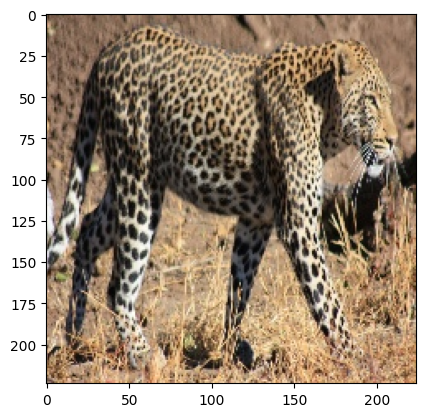

In [21]:
# 원본 사진
import matplotlib.pyplot as plt

plt.imshow(test_data[0][0].numpy().transpose(1,2,0))

In [22]:
test_data[0][0].shape

torch.Size([3, 224, 224])

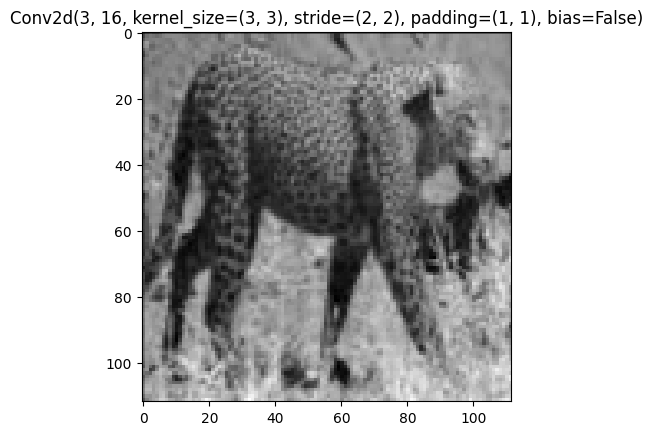

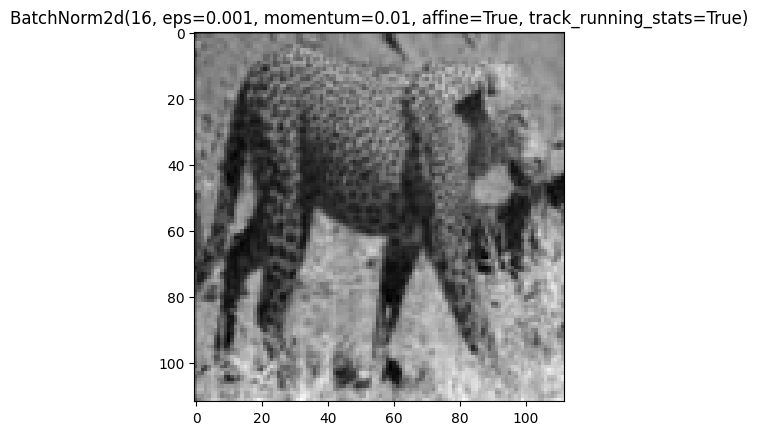

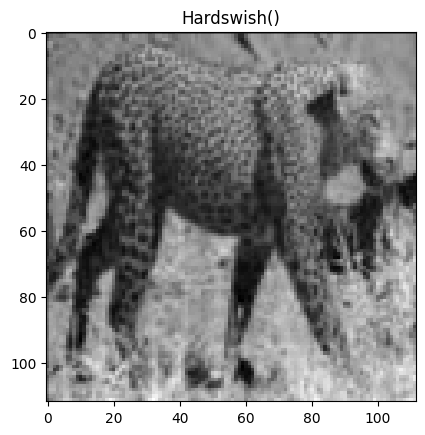

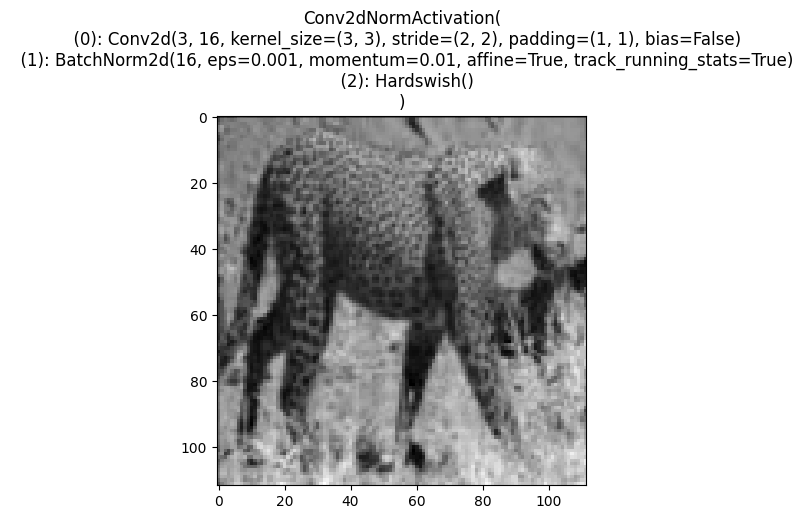

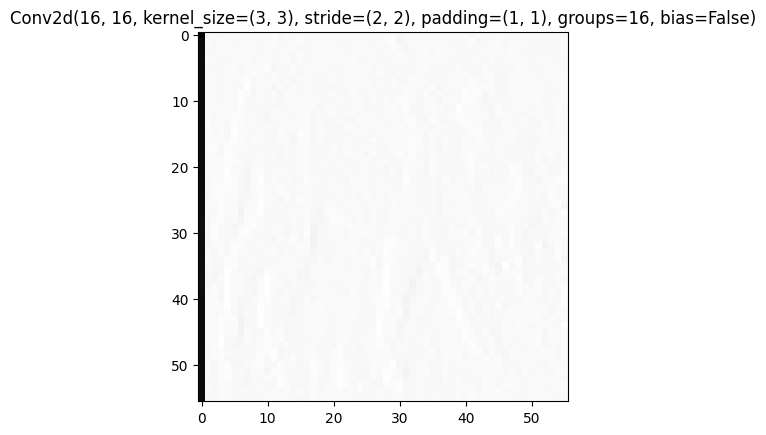

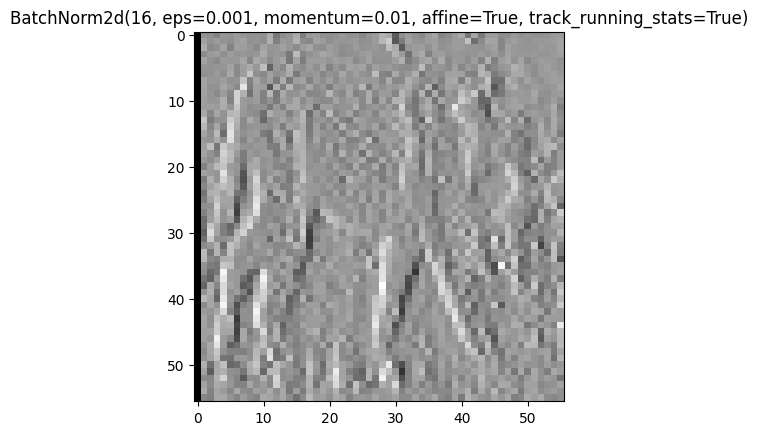

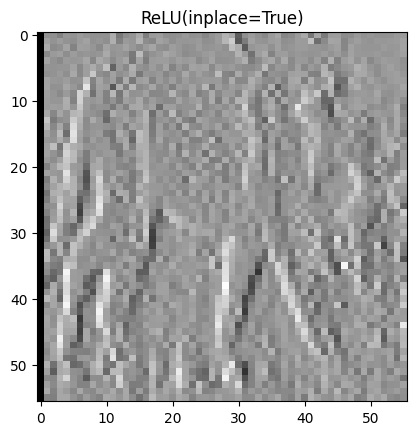

In [23]:


# 이미지와 각 레이어의 출력값 시각화
for i, (module, output) in enumerate(outputs.items()):
  plt.imshow(output[0][0].detach().to('cpu').numpy(), cmap='gray')
  plt.title(str(module))
  plt.show()
  if i>5: break # 일부 층만 출력


